# AP01 : Protocole 4 : Regression

Dans cette approche, nous allons réaliser des régressions avec comme variables explicatives des valeurs de loyers passées par rapport à la variable de sortie qui serait un mois en particulier.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Clean_Dataset_output_clients_menages_tabular.csv')

In [3]:
# data.columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19970 entries, 0 to 19969
Columns: 222 entries, age_std_x to cnc_dtdval
dtypes: float64(207), int64(1), object(14)
memory usage: 33.8+ MB


On peut voir que notre dataset possède actuellement 19970 lignes et 222 colonnes.

## 1. Préparation des données

### 1.1. Prise en main des colonnes pertinentes

Dans un premier temps, on pratiquera la régression sur le solde. Cependant on pourra travailler plus tard sur une grandeur `dette relative` sensée offrir une possibilité de comparaison **plus interprétable**.

`dette relative = solde/echeances`

In [4]:
# Quelques données dont on aura besoin
mois_connus = ['20180131', '20180228', '20180331', '20180430', '20180531', '20180630', '20180731', '20180831', '20180930', '20181031', '20181130', '20181231','20190131', '20190228', '20190331', '20190430', '20190531', '20190630', '20190731', '20190831', '20190930']

# Noms des colonnes
new_columns = ['dette_relative_' + mois for mois in mois_connus]
# new_columns

Les variables à utiliser pour le calcul de la dette relative sont: 
* `solde_std_201xxxxx`
* `mnt_ttc_echeance_std_201xxxxx`


#### a) Variables des échéances

In [5]:
# On isole les colonnes contenant les échéances de chaque mois
echeances_test = [col for col in data.columns if 'echeance' in col]
data[echeances_test].head()

,mnt_ttc_echeance_std_20180131,mnt_ttc_echeance_std_20180228,mnt_ttc_echeance_std_20180331,mnt_ttc_echeance_std_20180430,mnt_ttc_echeance_std_20180531,mnt_ttc_echeance_std_20180630,mnt_ttc_echeance_std_20180731,mnt_ttc_echeance_std_20180831,mnt_ttc_echeance_std_20180930,mnt_ttc_echeance_std_20181031,...,mnt_ttc_echeance_std_20181231,mnt_ttc_echeance_std_20190131,mnt_ttc_echeance_std_20190228,mnt_ttc_echeance_std_20190331,mnt_ttc_echeance_std_20190430,mnt_ttc_echeance_std_20190531,mnt_ttc_echeance_std_20190630,mnt_ttc_echeance_std_20190731,mnt_ttc_echeance_std_20190831,mnt_ttc_echeance_std_20190930
0,528.85,528.85,528.85,528.85,528.85,528.85,528.85,528.85,528.85,528.85,...,528.85,534.90,534.90,534.90,534.90,534.90,534.90,534.90,534.90,534.90
1,528.85,528.85,528.85,528.85,528.85,528.85,528.85,528.85,528.85,528.85,...,528.85,534.90,534.90,534.90,534.90,534.90,534.90,534.90,534.90,534.90
2,709.41,709.41,709.41,709.41,709.41,709.41,709.41,709.41,709.41,709.41,...,709.41,717.65,717.65,717.65,717.65,717.65,717.65,717.65,717.65,717.65
3,542.83,542.83,542.83,542.83,542.83,542.83,542.83,542.83,542.83,542.83,...,542.83,549.36,549.36,549.36,931.05,549.36,549.36,549.36,549.36,549.36
4,0.00,0.00,0.00,0.00,0.00,0.00,566.12,650.00,650.00,650.00,...,650.00,657.50,657.50,657.50,657.50,657.50,657.50,657.50,657.50,657.50


#### b) Variables des soldes

In [6]:
# On isole les variables contenant le solde
soldes_test = [col for col in data.columns if 'solde_std_' in col]
data[soldes_test].head()

,solde_std_20180131,solde_std_20180228,solde_std_20180331,solde_std_20180430,solde_std_20180531,solde_std_20180630,solde_std_20180731,solde_std_20180831,solde_std_20180930,solde_std_20181031,...,solde_std_20181231,solde_std_20190131,solde_std_20190228,solde_std_20190331,solde_std_20190430,solde_std_20190531,solde_std_20190630,solde_std_20190731,solde_std_20190831,solde_std_20190930
0,-81.18,-82.33,-83.48,-84.63,-85.78,-86.93,-88.08,-158.18,0.67,-0.48,...,-2.78,-3.93,0.97,5.87,10.77,-4.33,-19.43,-34.53,-112.29,-127.39
1,-653.09,-541.24,-758.09,-372.85,-370.00,-1256.46,-990.61,-194.28,-408.19,-480.74,...,-889.73,-264.96,-264.96,-132.92,-132.04,-132.04,-132.04,-264.08,70.26,137.90
2,488.89,438.89,741.30,691.30,641.30,238.89,188.89,71.81,-18.59,323.21,...,0.00,709.41,0.02,404.64,850.29,606.95,606.95,0.02,-58.49,-58.49
3,52.54,52.54,6.37,549.20,0.00,0.00,0.00,-1.12,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-137.00,0.00
4,0.00,0.00,0.00,0.00,0.00,599.77,599.77,1165.89,1216.12,2465.89,...,1820.11,1888.41,1911.63,1895.89,1845.89,1795.89,1745.89,1695.89,1595.89,1545.89


### 1.2. Sélection des périodes temporelles

On a récupéré au préalable (dans un autre protocole) une liste indiquant pour un nombre donné de mois consécutifs l'intervalle de temps contenant le plus de données. 

La liste ci-dessous donne:
`[nombre de mois, nombre de données, premier mois, dernier mois]`

In [7]:
# Cette variable n'est là qu'à titre indicatif ici, on ne l'utilise pas par la suite
# On pourrait cependant faire boucler la suite du code sur chaque période temporelle > 1

df_periodes = [[1, 19577, '2019-09-30', '2019-09-30'],
 [2, 17811, '2018-12-31', '2019-01-31'],
 [3, 17512, '2018-12-31', '2019-02-28'],
 [4, 17467, '2019-01-31', '2019-04-30'],
 [5, 17460, '2019-01-31', '2019-05-31'],
 [6, 17459, '2019-04-30', '2019-09-30'],
 [7, 17459, '20190331', '20190930'],
 [8, 17459, '2019-02-28', '2019-09-30'],
 [9, 17456, '2019-01-31', '2019-09-30'],
 [10, 17418, '2018-12-31', '2019-09-30'],
 [11, 6921, '2018-03-31', '2019-01-31'],
 [12, 6913, '2018-02-28', '2019-01-31'],
 [13, 6832, '2018-02-28', '2019-02-28'],
 [14, 6803, '2018-08-31', '2019-09-30'],
 [15, 6800, '2018-07-31', '2019-09-30'],
 [16, 6797, '2018-06-30', '2019-09-30'],
 [17, 6793, '2018-05-31', '2019-09-30'],
 [18, 6765, '2018-04-30', '2019-09-30'],
 [19, 6749, '2018-03-31', '2019-09-30'],
 [20, 6741, '2018-02-28', '2019-09-30'],
 [21, 6609, '2018-01-31', '2019-09-30']]

On pourra réaliser des régressions sur plusieurs de ces périodes, nous commencerons avec 7 mois (6 premiers mois comme variables explicatives, dernier mois comme variable à expliquer).

### 1.3. Isolation des données pour notre étude

Dans cette section, on s'évertuera, sur la période de temps choisie de 7 mois (20190331 - 20190930), à nettoyer les données en enlevant les lignes incomplètes.

In [8]:
# Tout d'abord on peut isoler les variables solde et echeance afin de ne pas empiéter sur le dataset d'origine
df = data[soldes_test + echeances_test]
# df.info()

#### a) Filtrage des colonnes

In [9]:
# Rappel: on la variable mois_connus = ['20180131', '20180228', '20180331', '20180430', '20180531', '20180630', '20180731', '20180831', '20180930', '20181031', '20181130', '20181231','20190131', '20190228', '20190331', '20190430', '20190531', '20190630', '20190731', '20190831', '20190930']
# L'indexe du mois 20190331 dans la liste mois_connus est 14 et celui de fin est 20

debut_index = 14
# On rajoute 1 à l'indexe de fin pour l'inclure -> cf. listes en Python
fin_index = 21

echeances_cols = ["mnt_ttc_echeance_std_" + mois for mois in mois_connus[debut_index:fin_index]]
soldes_cols = ["solde_std_" + mois for mois in mois_connus[debut_index:fin_index]]

df = df[echeances_cols + soldes_cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19970 entries, 0 to 19969
Data columns (total 14 columns):
mnt_ttc_echeance_std_20190331    19970 non-null float64
mnt_ttc_echeance_std_20190430    19970 non-null float64
mnt_ttc_echeance_std_20190531    19970 non-null float64
mnt_ttc_echeance_std_20190630    19970 non-null float64
mnt_ttc_echeance_std_20190731    19970 non-null float64
mnt_ttc_echeance_std_20190831    19970 non-null float64
mnt_ttc_echeance_std_20190930    19970 non-null float64
solde_std_20190331               19970 non-null float64
solde_std_20190430               19970 non-null float64
solde_std_20190531               19970 non-null float64
solde_std_20190630               19970 non-null float64
solde_std_20190731               19970 non-null float64
solde_std_20190831               19970 non-null float64
solde_std_20190930               19970 non-null float64
dtypes: float64(14)
memory usage: 2.1 MB


#### b) Filtrage des lignes

Pour réaliser ce filtrage, il faut retirer toutes les lignes qui contiennent des NaN ou des 0 dans les colonnes des échéances, signifiant que le locataire n'était pas présent sur l'intégralité de la période étudiée.

In [10]:
df.dropna(subset = echeances_cols, inplace=True)
df = df[(df[echeances_cols] != 0).all(1)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18205 entries, 0 to 19962
Data columns (total 14 columns):
mnt_ttc_echeance_std_20190331    18205 non-null float64
mnt_ttc_echeance_std_20190430    18205 non-null float64
mnt_ttc_echeance_std_20190531    18205 non-null float64
mnt_ttc_echeance_std_20190630    18205 non-null float64
mnt_ttc_echeance_std_20190731    18205 non-null float64
mnt_ttc_echeance_std_20190831    18205 non-null float64
mnt_ttc_echeance_std_20190930    18205 non-null float64
solde_std_20190331               18205 non-null float64
solde_std_20190430               18205 non-null float64
solde_std_20190531               18205 non-null float64
solde_std_20190630               18205 non-null float64
solde_std_20190731               18205 non-null float64
solde_std_20190831               18205 non-null float64
solde_std_20190930               18205 non-null float64
dtypes: float64(14)
memory usage: 2.1 MB


On a désormais un dataframe de 18205 lignes.

## 2. Régression en utilisant seulement les variables de dettes/solde

### 2.1. Sur le solde

On commence par une régression sur le solde pour sélectionner le meilleur modèle.

#### Modules nécessaires

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model

# -> Cross validation
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
# <-

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

#### Input & output

In [12]:
df_soldes = df[soldes_cols]

X_soldes = df_soldes.drop(soldes_cols[-1], axis=1)
Y_soldes = df_soldes.drop(soldes_cols[:-1], axis=1)

#### Model Selection

On va tester plusieurs modèles classiques afin de déterminer le meilleur choix possible.

Pour cela, on réalisera une Cross-Validation à 5 folds dans chaque cas, en utilisant les Pipeline et la fonction cross_val_score() offerts par Sklearn.De plus, on utilisera comme estimateur l'erreur absolue moyenne (MAE).

* **Régression linéaire**

In [13]:
from sklearn import linear_model

In [14]:
linear_reg_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', linear_model.LinearRegression())
                             ])

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(linear_reg_pipeline, X_soldes, Y_soldes.values.ravel(),
                              cv=5,
                              scoring='neg_mean_absolute_error')
err_reg_lin = str(scores.mean())

print("Mean Absolute Error pour chaque fold de la Cross-Validation:\n", scores, "\nMAE moyenne:", err_reg_lin)

('Mean Absolute Error pour chaque fold de la Cross-Validation:\n', array([80.52333289, 70.88869256, 86.77073828, 86.06012003, 79.79362027]), '\nMAE moyenne:', '80.8073008074414')


* **Ridge**

In [15]:
# RidgeCV implémente Ridge avec une Cross-validation built-in pour la valeur d'alpha
reg = linear_model.RidgeCV(alphas = np.logspace(-6, 6, 13))
reg.fit(X_soldes, Y_soldes)
reg.alpha_

1000000.0

In [16]:
train_X, val_X, train_y, val_y = train_test_split(X_soldes, Y_soldes, random_state = 2)
reg.fit(train_X, train_y)
pred = reg.predict(val_X)
print("MAE pour un test sans CV: ", mean_absolute_error(val_y, pred))

('MAE pour un test sans CV: ', 78.69639964646983)


In [17]:
ridge_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', linear_model.Ridge(alpha=1000000))
                             ])

scores_ridge = -1 * cross_val_score(ridge_pipeline, X_soldes, Y_soldes.values.ravel(),
                              cv=5,
                              scoring='neg_mean_absolute_error')
err_ridge = str(scores_ridge.mean())
print("Mean Absolute Error pour chaque fold de la Cross-Validation:\n", scores_ridge, "\nMAE moyenne:", err_ridge)


('Mean Absolute Error pour chaque fold de la Cross-Validation:\n', array([80.54357977, 70.89378107, 86.75912184, 86.06894431, 79.80678826]), '\nMAE moyenne:', '80.81444305075624')


Ridge a un impact extrêmement faible et performe très légèrement moins bien que la régression linéaire ordinaire.

* **Régression polynomiale**

In [18]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model

linear_reg_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', linear_model.LinearRegression())
                                      ])
degre=list(range(1,5))
                                     
err_reg_poly=len(degre)*[0]
## Le degré 1 correspond à une regression linéaire classique (polynome de degré 1)
for i in degre:
    polynomial_features= PolynomialFeatures(degree=i)
    X_soldes_poly = polynomial_features.fit_transform(X_soldes)


    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(linear_reg_pipeline, X_soldes_poly, Y_soldes.values.ravel(),
                                  cv=5,
                                  scoring='neg_mean_absolute_error')
    err_reg_poly[i-1] = str(scores.mean())

    print("Degre ", i, " : Mean Absolute Error pour chaque fold de la Cross-Validation:\n", scores, "\nMAE moyenne:",err_reg_poly[i-1] )

('Degre ', 1, ' : Mean Absolute Error pour chaque fold de la Cross-Validation:\n', array([80.52333289, 70.88869256, 86.77073828, 86.06012003, 79.79362027]), '\nMAE moyenne:', '80.80730080744145')
('Degre ', 2, ' : Mean Absolute Error pour chaque fold de la Cross-Validation:\n', array([82.09545843, 72.8050915 , 87.31731813, 88.37472988, 81.67449503]), '\nMAE moyenne:', '82.45341859442497')
('Degre ', 3, ' : Mean Absolute Error pour chaque fold de la Cross-Validation:\n', array([ 92.81637643,  86.78126392,  96.15638202, 113.25686904,
        93.12238532]), '\nMAE moyenne:', '96.42665534695607')
('Degre ', 4, ' : Mean Absolute Error pour chaque fold de la Cross-Validation:\n', array([244.03473329, 278.86897538, 178.58716604, 448.17408768,
       371.17473335]), '\nMAE moyenne:', '304.16793914882203')


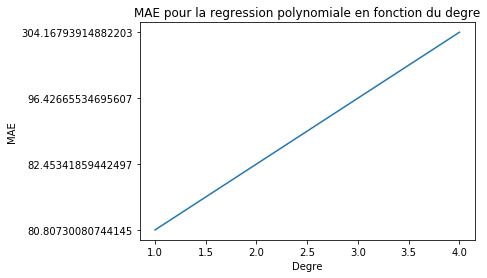

In [19]:
#Visualisation
plt.plot(degre,err_reg_poly)
plt.xlabel('Degre')
plt.ylabel('MAE')
plt.title('MAE pour la regression polynomiale en fonction du degre')
plt.show()

La regression polynomiale performe très faiblement. De plus, la MAE moyenne augmente exponentiellement avec le degré du polynôme. 

* **Random Forest**

In [20]:
from sklearn.ensemble import RandomForestRegressor

RF_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', RandomForestRegressor(n_estimators=50,
                                                              random_state=0))
                             ])

scores = -1 * cross_val_score(RF_pipeline, X_soldes, Y_soldes.values.ravel(),
                              cv=5,
                              scoring='neg_mean_absolute_error')
err_random_f = str(scores.mean())

print("Mean Absolute Error pour chaque fold de la Cross-Validation:\n", scores, "\nMAE moyenne:",err_random_f )


('Mean Absolute Error pour chaque fold de la Cross-Validation:\n', array([ 83.68896666,  84.98115648, 100.13442048,  89.14605842,
        83.36689651]), '\nMAE moyenne:', '88.26349970885943')


Avec une MAE de 88,26, Random forest ne semble pas être la méthode de régression la plus performante.

Bien que l'on ne s'attendait pas à un résultat nécessairement concluant, nous avons tout de même testé avec les SVM.
* **SVM**

In [ ]:
from sklearn import svm

SVR_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', svm.SVR())
                             ])

# Multiply by -1 since sklearn calculates *negative* MAE
scores_svr = -1 * cross_val_score(SVR_pipeline, X_soldes, Y_soldes.values.ravel(),
                              cv=5,
                              scoring='neg_mean_absolute_error')
err_svm = str(scores_svr.mean())
print("Mean Absolute Error pour chaque fold de la Cross-Validation:\n", scores_svr, "\nMAE moyenne:",err_svm )


c:\python27\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


* **Récapitulatif de la regression du le solde**

Nous devons à présent sélectionner le ou les modèles présentant le moins d'erreurs pour pouvoir effectuer la régression sur la dette relative.
Voici un récapitulatif des résultats trouvés précédemment :

In [ ]:
err_reg = [err_reg_lin,err_ridge,err_reg_poly,err_random_f,err_svm]
list_model = ['Reg. lineaire','Ridge','Reg. polynomiale','Random Forest','SVM']

for i in range(0, 5):
    if (i==2):
        for j in range(0,4):
            print('MAE regression polynomiale de degre ',j+1,' : ',err_reg_poly[j],' \n')
    else:
        print('MAE regression ',list_model[i]," : ",err_reg[i],'\n')

La régression linéaire est celle présentant le moins d'erreurs. La variation ridge est très proche mais n'apporte pas grand chose. On poursuit alors avec la régression linéaire.

### 2.2. Sur la dette relative

On a vu précédemment que la régression linéaire avait les meilleures performances de régression sur le solde, avec un écart moyen de 80,80€. Cette section sera dédiée à la réalisation de prédictions sur la dette relative afin d'observer de manière plus interprétable les résultats de prédictions.

In [ ]:
for mois in mois_connus[debut_index:fin_index]:
    df['dette_relative_' + mois] = df['solde_std_'+ mois] / df['mnt_ttc_echeance_std_'+ mois]

df_dettes = pd.DataFrame(data=df, columns=[col for col in df.columns if "dette_relative" in col])

df_dettes.head()

In [ ]:
X_dettes = df_dettes.drop([col for col in df.columns if "dette_relative" in col][-1], axis=1)
Y_dettes = df_dettes.drop([col for col in df.columns if "dette_relative" in col][:-1], axis=1)

Y_dettes.head()

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split


train_X, val_X, train_y, val_y = train_test_split(X_dettes, Y_dettes['dette_relative_20190930'], random_state = 0)

model_reg = linear_model.LinearRegression()

model_reg.fit(train_X, train_y)

predictions = model_reg.predict(val_X)
print(mean_absolute_error(val_y, predictions))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(predictions[100:150], 'r', label="Predictions")
ax.plot(val_y[100:150].values, label="Valeurs justes")
ax.legend()
plt.title('Linear regression model - 6 months of training')
plt.savefig('predictions_6mois.png')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15,20))

ax.plot(predictions, 'r.', label="Predictions")
ax.plot(val_y.values, '+', label="Vraies valeurs")
plt.title('Linear regression model - 6 months of training')
plt.savefig('Predictions_nuage_6mois.png')
ax.legend()
plt.show()

###  2.3. La dette a-t-elle augmenté ou diminué?

Les graphiques ci-dessus semblent montrer que la régression n'a pas si mal fonctionné dans la plupart des cas, on peut maintenant s'intéresser à découvrir si elle prédit bien si la dette augmente ou diminue. 

Pour cela, on va comparer:
* la dette du dernier mois versus la dette de l'avant-dernier
* la **prédiction** de la dette du dernier mois versus la dette de l'avant-dernier
---

* Avant-dernier mois: 20190831
* Dernier mois: 20190930

Dans ces deux cas, on assignera **True** si la dette a **augmenté** ou  stagné; **False** si elle a **diminué**.

Etant donné qu'il y a des valeurs négatives, nous devons ajuster la comparaison pour qu'elle prenne ceci en compte

In [ ]:
vraie_valeur_augmente = val_X['dette_relative_20190831'] >= val_y
prediction_augmente = val_X['dette_relative_20190831'] >= predictions

Maintenant que l'on sait pour les prédictions et les vraies valeurs si cela a augmenté ou pas, on peut les comapraer à l'aide d'une matrice de confusion:

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(vraie_valeur_augmente, prediction_augmente)
conf_matrix

A l'aide de cette matrice de confusion, on peut regarder la proportion de prédictions qui ont su dire avec exactitude si la dette augmentait ou pas.

In [ ]:
true_neg, false_pos, false_neg, true_pos = conf_matrix.ravel()

true_predictions = float(true_pos+true_neg) / float(val_y.count())

print("Pourcentage de prédictions justes: ", true_predictions*100, "%")